## Improving Linear Regression Model using Feature Selection to predict type of bike riders

#### <b>Dataset Background</b> ####
* This dataset is provided by Professor Hadi Fanaee-T, Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto. 
* It was obtained from UCI Machine Learning Repo 
* For more information, this dataset can be found at <a href="https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset" target="_blank">this link</a>

#### <b>Data Analysis Objective </b> ####
* Predict the count of casual, registered, and both types of riders

#### <b>Tasks For Analysis </b> ####
* Perform EDA analysis on the dataset
* Scale and Transform using MinMaxScaler and OneHotEncoder
* Split dataset for training and testing
* Create LinearRegression model and pass train/test data
* Apply Feature Selection and pass train/test data 
* Compare before-after Performance Metrics (RMSE,ME,MAE,MPE,MAPE,AIC,BIC, Adjusted R-squared)


#### Import required packages

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import forward_selection

In [62]:
## Changing File Path
import os
os.getcwd()
#os.chdir('/Users/shanaaz/Desktop/Portfolio/Github') # relative path: scripts dir is under Lab

'/Users/shanaaz/Desktop/Portfolio/Github'

#### Load the dataset

In [9]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

In [10]:
day_df.head(6)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
5           1  0.204348  0.233209  0.518261   0.089565      88        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606

In [11]:
day_df.shape

(731, 16)

In [12]:
hour_df.head(6)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           1  0.22  0.2727  0.80     0.0000       8          32   40  
2           1  0.22  0.2727  0.80     0.0000       5          27   32  
3           1  0.24  0.2879  0.75     0.0000       3          10   13  
4           1  0.24  0.2879  0.75     0.0000       0           1    1  
5           2  0.24  0.2576  0.75     0.0896       0           1    1

In [13]:
hour_df.shape

(17379, 17)

#### Data pre-processing (Clean and Modify data)

In [14]:
## Check for duplicate data, null records, number of rows and number of columns.
print("For the day_df dataset,")
duplicate_day = day_df.duplicated()
print("There are",(duplicate_day.sum()),"number of duplicated records")
print("There are",sum(day_df.isnull().sum()),"number of null records")
print("There are",day_df.shape[0],"number of rows and",day_df.shape[1],"number of columns")

For the day_df dataset,
There are 0 number of duplicated records
There are 0 number of null records
There are 731 number of rows and 16 number of columns


In [15]:
## Check for duplicate data, null records, number of rows and number of columns.
print("For the hour_df dataset,")
duplicate_hour= hour_df.duplicated()
print("There are",(duplicate_hour.sum()),"number of duplicated records")
print("There are",sum(hour_df.isnull().sum()),"number of null records")
print("There are",hour_df.shape[0],"number of rows and",hour_df.shape[1],"number of columns")

For the hour_df dataset,
There are 0 number of duplicated records
There are 0 number of null records
There are 17379 number of rows and 17 number of columns


In [16]:
## check for number of unique values
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [17]:
## check for number of unique values
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [18]:
## To view column type
day_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
## View the day_df information, especially for the numerical variables [temp,atemp,hum,windspeed]
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [21]:
## View the hour_df information, especially for the numerical variables [temp,atemp,hum,windspeed]
hour_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [22]:
## Categorical variables for hour_df dataset
categorical_vars_hour = ['yr','holiday','workingday','season','mnth','hr','weekday','weathersit']

## Categorical variables for day_df dataset
categorical_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

## Store the numerical variable into a list
numerical_vars =['temp','atemp','hum','windspeed']

#### Exploratory Data Analysis Visualizations

<Figure size 3600x2160 with 0 Axes>

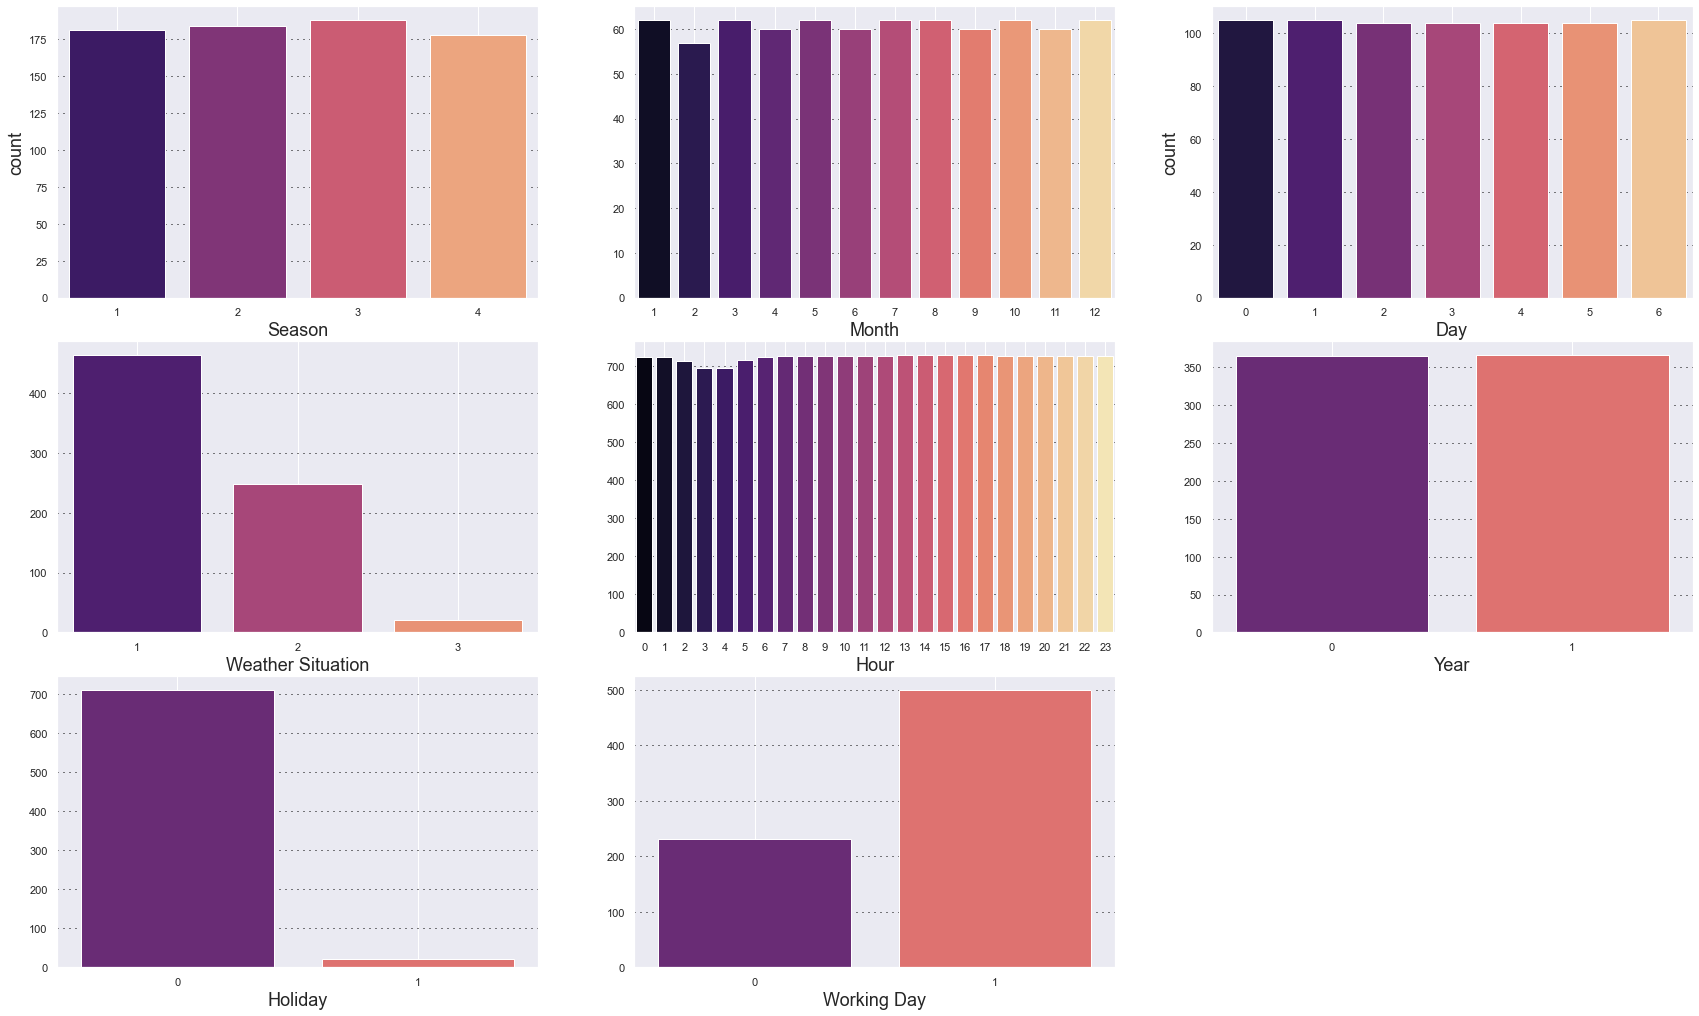

In [23]:
## Visualize the categorical variables
sns.set_theme(style="darkgrid")

fig = plt.figure(figsize=(50,30))

## Reduce the space between the plots
gs = fig.add_gridspec(5,5)
gs.update(wspace=0.2, hspace=0.15)
fig = plt.figure(figsize=(50,30))

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])

color_palette = "magma"

ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax0,data=day_df,x='season',palette=color_palette)
ax0.set_xlabel("Season",fontsize=18)
ax0.set_ylabel("count",fontsize=18)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=day_df,x='mnth',palette=color_palette)
ax1.set_xlabel("Month",fontsize=18)
ax1.set_ylabel("")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=day_df,x='weekday',palette=color_palette)
ax2.set_xlabel("Day", fontsize=18)
ax2.set_ylabel("count", fontsize=18)

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=day_df,x='weathersit',palette=color_palette)
ax3.set_xlabel("Weather Situation", fontsize=18)
ax3.set_ylabel("")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=hour_df,x='hr',palette=color_palette)
ax4.set_xlabel("Hour", fontsize=18)
ax4.set_ylabel("")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=day_df,x='yr',palette=color_palette)
ax5.set_xlabel("Year", fontsize=18)
ax5.set_ylabel("")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=day_df,x='holiday',palette=color_palette)
ax6.set_xlabel("Holiday", fontsize=18)
ax6.set_ylabel("")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=day_df,x='workingday',palette=color_palette)
ax7.set_xlabel("Working Day", fontsize=18)
ax7.set_ylabel("")


ax0.grid(True, which='major')
ax1.grid(True, which='major')
ax2.grid(True, which='major')
ax3.grid(True, which='major')
ax4.grid(True, which='major')
ax5.grid(True, which='major')
ax6.grid(True, which='major')
ax7.grid(True, which='major')


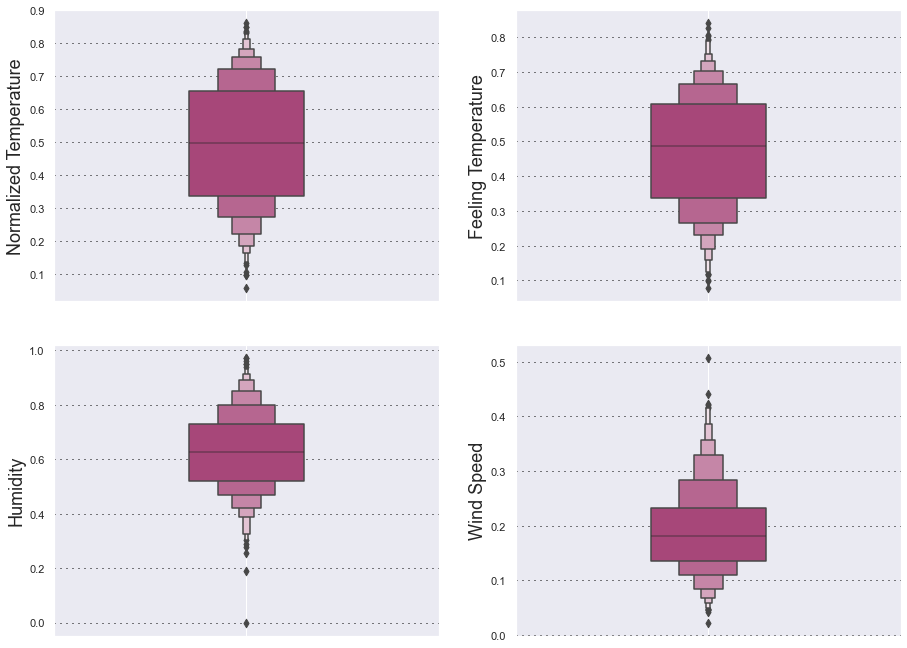

In [24]:
## Visualize the numerical/continuous variables (not including the indicator/dummy variables)

sns.set_theme(style="darkgrid")

fig = plt.figure(figsize=(40,30))
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

## Reduce the space between the plots
gs = fig.add_gridspec(4,4)
gs.update(wspace=0.2, hspace=0.15)

color_palette = "magma"

ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax0,data=day_df,y='temp',palette=color_palette, width=0.3)
ax0.set_xlabel("")
ax0.set_ylabel("Normalized Temperature",fontsize=18)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,data=day_df,y='atemp',palette=color_palette, width=0.3)
ax1.set_xlabel("")
ax1.set_ylabel("Feeling Temperature",fontsize=18)

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,data=day_df,y='hum',palette=color_palette, width=0.3)
ax2.set_xlabel("")
ax2.set_ylabel("Humidity",fontsize=18)

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,data=day_df,y='windspeed',palette=color_palette, width=0.3)
ax3.set_xlabel("")
ax3.set_ylabel("Wind Speed",fontsize=18)


ax0.grid(True, which='major')
ax1.grid(True, which='major')
ax2.grid(True, which='major')
ax3.grid(True, which='major')

In [25]:
## Visualize the correlation matrix between the variables in day_df dataset
corr = day_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [26]:
## Visualize the correlation matrix between the variables in hour_df dataset
corr = hour_df.corr()
corr.style.background_gradient(cmap='coolwarm')

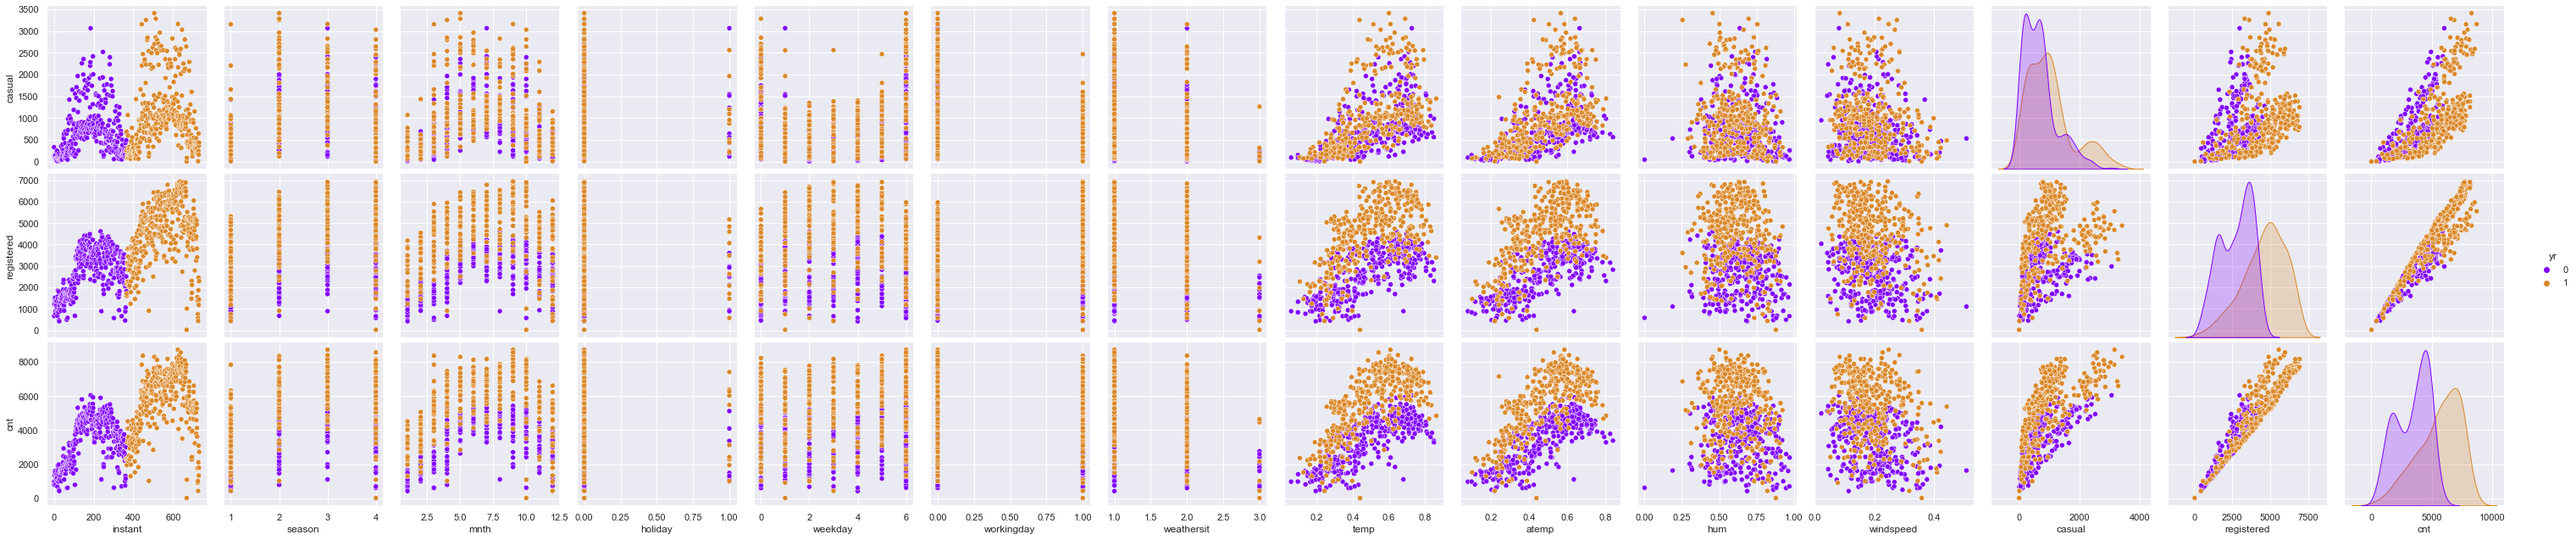

In [27]:
## Visualize relationship between the target variables ('casual','registered',cnt) and predictors/features for day_df
y_vars = ["casual","registered","cnt"]
sns.pairplot(day_df,hue='yr',palette = ["#8000ff","#da8829"],y_vars=y_vars,height=3)

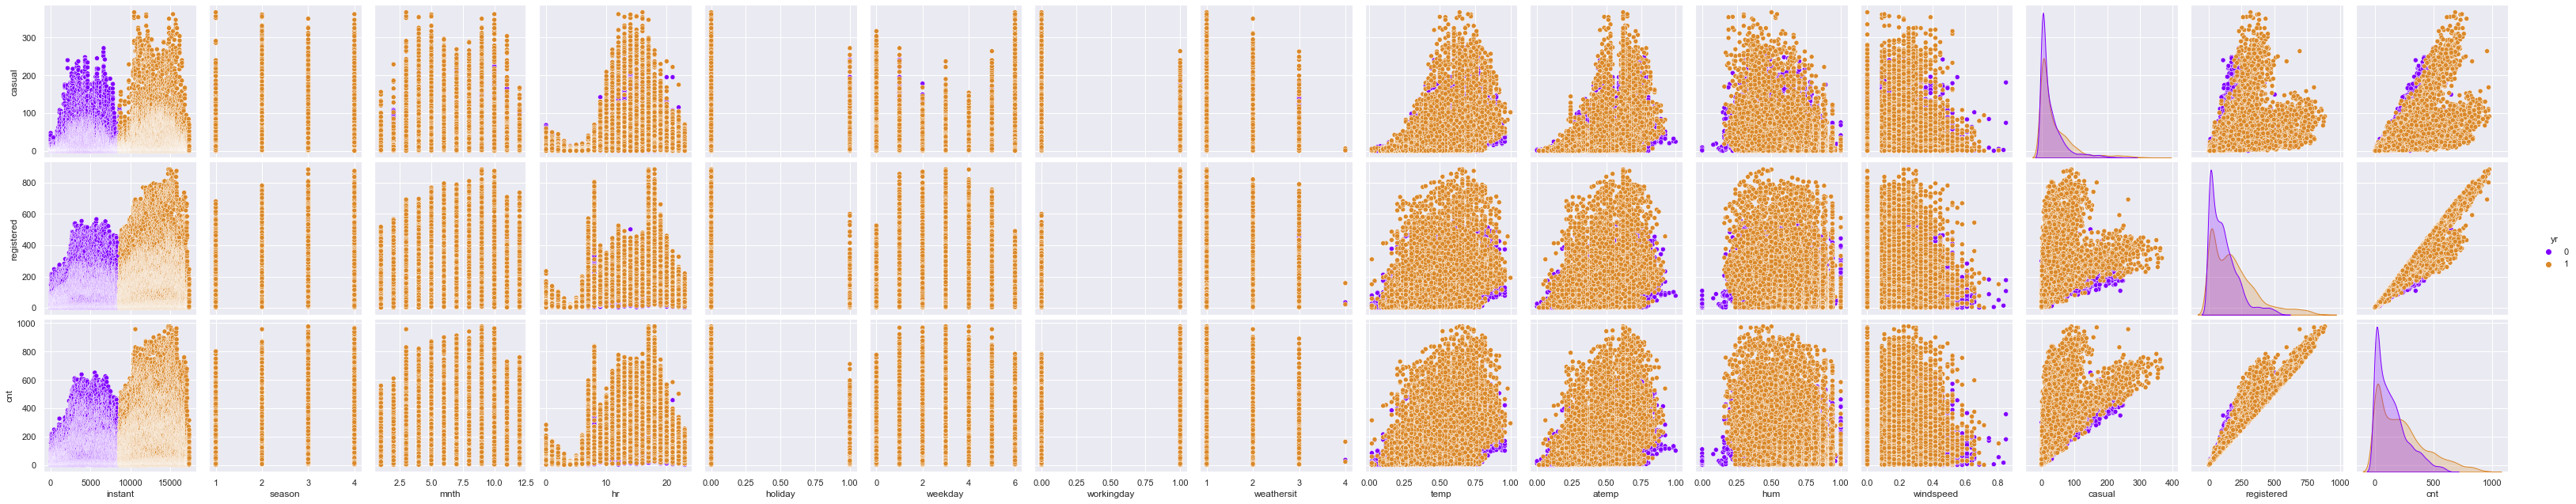

In [28]:
## Visualize relationship between the target variables ('casual','registered',cnt) and predictors/features for hour_df
y_vars = ["casual","registered","cnt"]
sns.pairplot(hour_df,hue='yr',palette = ["#8000ff","#da8829"],y_vars=y_vars,height=3)

<Figure size 720x720 with 0 Axes>

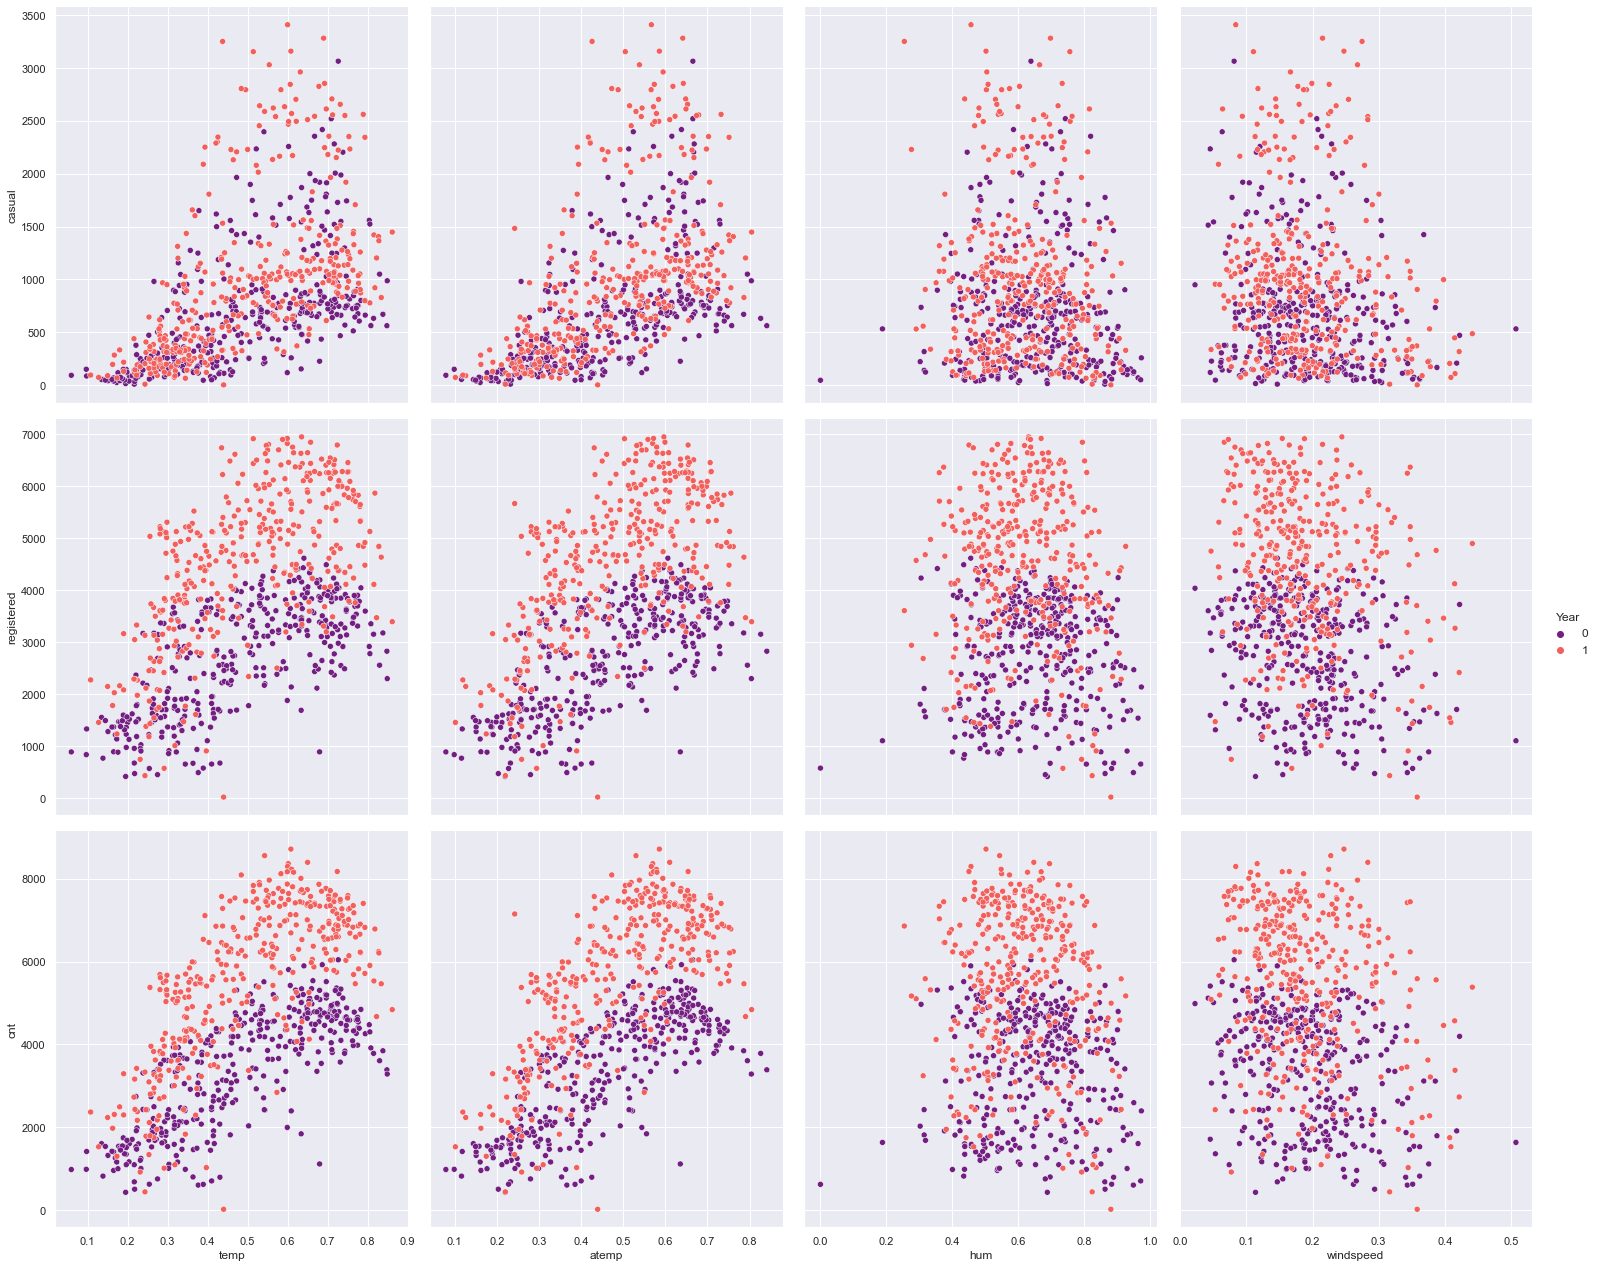

<Figure size 720x720 with 0 Axes>

In [29]:
## Visualize the relationship between the numerical variables and target variables in day_df dataset

x_vars = ["temp","atemp","hum","windspeed"]
y_vars = ["casual","registered","cnt"]
g = sns.PairGrid(day_df, hue="yr", x_vars=x_vars, y_vars=y_vars,palette="magma",height=6,aspect=0.9)
g.map_diag(sns.histplot) 
g.map_offdiag(sns.scatterplot)
g.add_legend(title='Year', fontsize= '12')
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

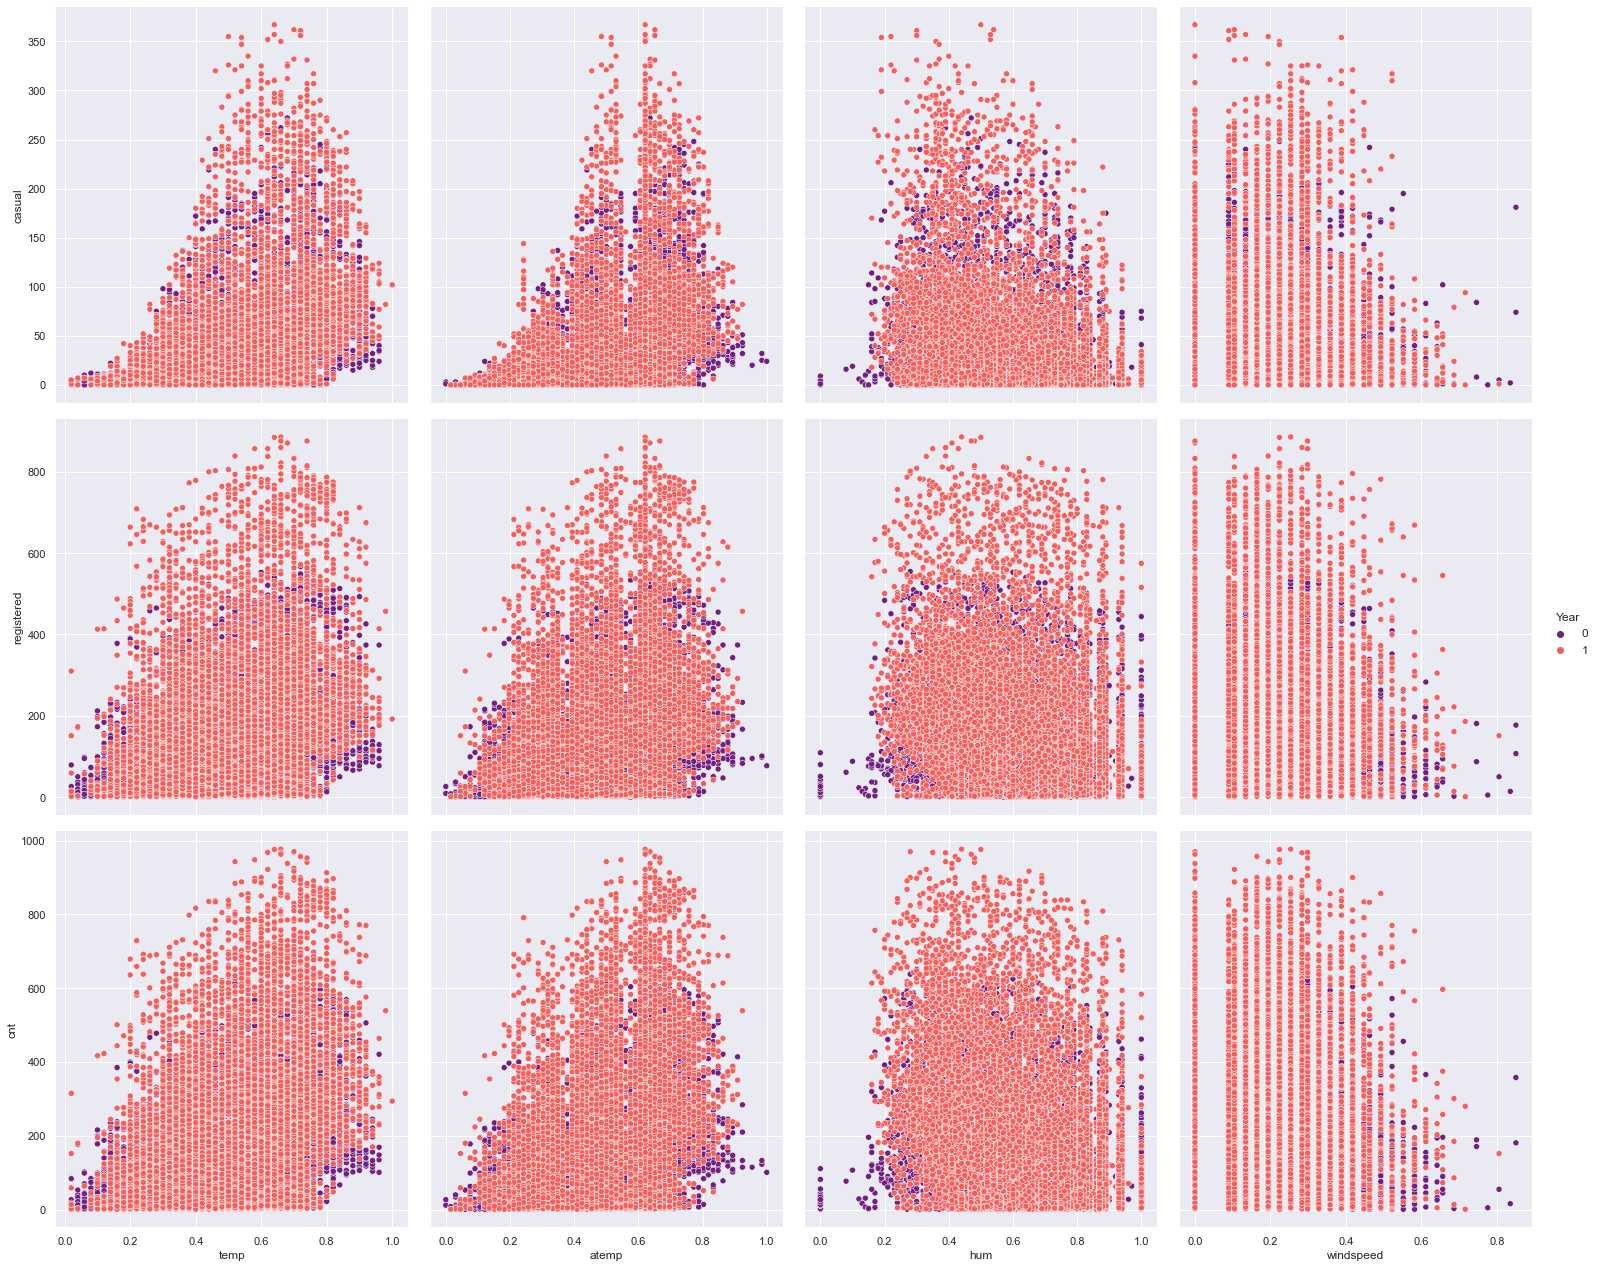

<Figure size 720x720 with 0 Axes>

In [30]:
## Visualize the relationship between the numerical variables and target variables in hour_df
 
x_vars = ["temp","atemp","hum","windspeed"]
y_vars = ["casual","registered","cnt"]
g = sns.PairGrid(hour_df, hue="yr", x_vars=x_vars, y_vars=y_vars,palette="magma",height=6,aspect=0.9)
g.map_diag(sns.histplot) 
g.map_offdiag(sns.scatterplot)
g.add_legend(title='Year', fontsize= '12')
ax0.set_xlabel("")
ax0.set_ylabel("Normalized Temperature",fontsize=18)

plt.figure(figsize=(10, 10))

### Data Observations ###
* No duplicates/null in the data
* There more number of riders when the weather situation = 1(Clear, Few Clouds, Partly Cloudy)
* There are more registered riders in 2012 than 2011
* Registered riders use the bike when temperatures, humidity and windspeed are more optimal, in comparison to casual riders
* Casual riders do not use the bike when windspeed is high
* Based on the correlation matrix, there is not much collinearity among the variables in both the day and hour datasets
* From the pairgrid, we can tell that there are more casual/registered/both riders for higher humidity
* Based on the pairplot, there seems to be better distribution of the data for the day_df dataset

##### I will proceed in using the day dataset to predict the target variables casual, registered and both type users.

#### Split the dataset before scaling

In [31]:
train_df, test_df = train_test_split(day_df, test_size=0.2)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [32]:
train_df.shape, test_df.shape

((584, 16), (147, 16))

#### Scale and Transform the dataset for modelling

In [33]:
train_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean   365.443493    2.517123    0.493151    6.583904    0.032534    3.051370   
std    210.720353    1.120393    0.500382    3.464569    0.177566    1.969954   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    184.750000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    360.500000    3.000000    0.000000    7.000000    0.000000    3.000000   
75%    547.250000    4.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.695205    1.405822    0.494408    0.474041    0.631374    0.188009   
std      0.460715    0.541297    0.182522    0.162261    0.142797    0.077252   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.333750    0.337259    0.524583    0.133083   
50%      1.000000    1.000000    0.494167    0.481364    0.635208    0.176937   
75%      1.000000    2.000000    0.653542    0.607962    0.731667    0.231664   
max      1.000000    3.000000    0.861667    0.826371    0.972500    0.507463   

            casual   registered          cnt  
count   584.000000   584.000000   584.000000  
mean    830.414384  3655.386986  4485.801370  
std     671.151530  1558.375278  1934.079132  
min       2.000000    20.000000    22.000000  
25%     308.500000  2505.500000  3110.000000  
50%     694.500000  3660.000000  4508.000000  
75%    1084.250000  4730.750000  5908.250000  
max    3410.000000  6946.000000  8714.000000

In [34]:
## Initialized the MinMaxScaler to scale the numericals variabls to 0 and 1
scaler = MinMaxScaler()
train_transformed_df=pd.DataFrame(scaler.fit_transform(train_df[numerical_vars]))

In [35]:
## Added the column names
train_transformed_df.columns=['temp','atemp','hum','windspeed']

In [36]:
## Verified shape
train_transformed_df.shape

(584, 4)

In [37]:
## Obtain the dummy variables for the categorical data
def get_one_hot_encoded_col(train_df, test_df, input_col):
    enc = OneHotEncoder(handle_unknown = 'ignore')
    enc.fit(np.array(train_df[input_col]).reshape(-1, 1))

    encoded_train = enc.transform(np.array(train_df[input_col]).reshape(-1, 1)).toarray()
    encoded_test = enc.transform(np.array(test_df[input_col]).reshape(-1, 1)).toarray()
    
    encoded_cols = ['{}_{}'.format(input_col, i) for i in range(encoded_train.shape[1])]
    
    return encoded_train, encoded_test, encoded_cols

In [38]:
oh_season_train, oh_season_test, oh_season_cols = get_one_hot_encoded_col(train_df, test_df, 'season')
oh_yr_train, oh_yr_test, oh_yr_cols = get_one_hot_encoded_col(train_df, test_df, 'yr')
oh_mnth_train, oh_mnth_test, oh_mnth_cols = get_one_hot_encoded_col(train_df, test_df, 'mnth')
oh_holiday_train, oh_holiday_test, oh_holiday_cols = get_one_hot_encoded_col(train_df, test_df, 'holiday')
oh_weekday_train, oh_weekday_test, oh_weekday_cols = get_one_hot_encoded_col(train_df, test_df, 'weekday')
oh_workdingday_train, oh_workdingday_test, oh_workingday_cols = get_one_hot_encoded_col(train_df, test_df, 'workingday')
oh_weathersit_train, oh_weathersit_test, oh_weathersit_cols = get_one_hot_encoded_col(train_df, test_df, 'weathersit')

In [39]:
dummy_categorical_train_df = pd.DataFrame(np.concatenate((oh_season_train, oh_yr_train, 
                                                    oh_mnth_train, oh_holiday_train, oh_weekday_train, oh_workdingday_train, 
                                                    oh_weathersit_train), axis=1))

In [40]:
train_transformed_df = pd.concat([train_transformed_df,dummy_categorical_train_df],axis=1)

In [41]:
## Add columns to the converted dataframe
train_transformed_df.columns = ['temp', 'atemp', 'hum', 'windspeed'] + oh_season_cols + oh_yr_cols + oh_mnth_cols + oh_holiday_cols + oh_weekday_cols + oh_workingday_cols + oh_weathersit_cols

## Print column names
train_transformed_df.shape

(584, 36)

In [42]:
train_transformed_df.head(6)

temp     atemp       hum  windspeed  season_0  season_1  season_2  \
0  0.278465  0.290855  0.639768   0.270905       1.0       0.0       0.0   
1  0.428893  0.433991  0.640103   0.514125       0.0       0.0       0.0   
2  0.475620  0.470333  0.471294   0.534621       0.0       0.0       0.0   
3  0.672912  0.659575  0.687661   0.271790       0.0       0.0       1.0   
4  0.792325  0.755041  0.497001   0.385880       0.0       0.0       1.0   
5  0.611648  0.599609  0.894602   0.369225       0.0       1.0       0.0   

   season_3  yr_0  yr_1  ...  weekday_2  weekday_3  weekday_4  weekday_5  \
0       0.0   0.0   1.0  ...        0.0        0.0        0.0        0.0   
1       1.0   1.0   0.0  ...        0.0        0.0        0.0        1.0   
2       1.0   1.0   0.0  ...        0.0        0.0        0.0        0.0   
3       0.0   0.0   1.0  ...        0.0        0.0        0.0        1.0   
4       0.0   1.0   0.0  ...        0.0        0.0        0.0        0.0   
5       0.0   1.0   0.0  ...        0.0        1.0        0.0        0.0   

   weekday_6  workingday_0  workingday_1  weathersit_0  weathersit_1  \
0        0.0           0.0           1.0           1.0           0.0   
1        0.0           0.0           1.0           0.0           1.0   
2        0.0           1.0           0.0           1.0           0.0   
3        0.0           0.0           1.0           1.0           0.0   
4        1.0           1.0           0.0           1.0           0.0   
5        0.0           0.0           1.0           0.0           1.0   

   weathersit_2  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  

[6 rows x 36 columns]

In [43]:
## Transform the test dataset
test_transformed_df=pd.DataFrame(scaler.transform(test_df[numerical_vars]))
test_transformed_df.columns=['temp','atemp','hum','windspeed']
test_transformed_df.shape

(147, 4)

In [44]:
dummy_categorical_test_df = pd.DataFrame(np.concatenate((oh_season_test, oh_yr_test, 
                                                    oh_mnth_test, oh_holiday_test, oh_weekday_test, oh_workdingday_test, 
                                                    oh_weathersit_test), axis=1))

In [45]:
test_transformed_df = pd.concat([test_transformed_df,dummy_categorical_test_df],axis=1)

In [46]:
## Add columns to the converted dataframe
test_transformed_df.columns = ['temp', 'atemp', 'hum', 'windspeed'] + oh_season_cols + oh_yr_cols + oh_mnth_cols + oh_holiday_cols + oh_weekday_cols + oh_workingday_cols + oh_weathersit_cols

## Print column names
test_transformed_df.shape

(147, 36)

In [47]:
test_transformed_df.head(6)

temp     atemp       hum  windspeed  season_0  season_1  season_2  \
0  0.405012  0.416266  0.931020   0.279512       0.0       0.0       0.0   
1  0.820361  0.766025  0.435733   0.293574       0.0       0.0       1.0   
2  0.245101  0.239708  0.523136   0.314103       0.0       0.0       0.0   
3  0.877471  0.863180  0.663239   0.292318       0.0       0.0       1.0   
4  0.416433  0.417113  0.546701   0.314111       1.0       0.0       0.0   
5  0.481850  0.481306  0.491431   0.751290       0.0       1.0       0.0   

   season_3  yr_0  yr_1  ...  weekday_2  weekday_3  weekday_4  weekday_5  \
0       1.0   0.0   1.0  ...        0.0        0.0        0.0        0.0   
1       0.0   1.0   0.0  ...        0.0        0.0        1.0        0.0   
2       1.0   0.0   1.0  ...        0.0        0.0        1.0        0.0   
3       0.0   0.0   1.0  ...        0.0        0.0        0.0        0.0   
4       0.0   0.0   1.0  ...        0.0        0.0        0.0        0.0   
5       0.0   0.0   1.0  ...        0.0        0.0        0.0        0.0   

   weekday_6  workingday_0  workingday_1  weathersit_0  weathersit_1  \
0        0.0           1.0           0.0           0.0           1.0   
1        0.0           0.0           1.0           1.0           0.0   
2        0.0           0.0           1.0           1.0           0.0   
3        0.0           0.0           1.0           1.0           0.0   
4        1.0           1.0           0.0           1.0           0.0   
5        0.0           0.0           1.0           1.0           0.0   

   weathersit_2  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  

[6 rows x 36 columns]

#### Train the model

In [48]:
## Initialize linear regession model to predict count of casual riders
casual_lr = LinearRegression()

## Fit the training data to the LinearRegression model
casual_lr.fit(train_transformed_df, train_df['casual'])

casual_lr.score(train_transformed_df, train_df['casual'])


0.7313996978922768

In [49]:
## Initialize linear regession model
registered_lr = LinearRegression()

## Fit the training data to the LinearRegression model
registered_lr.fit(train_transformed_df, train_df['registered'])

LinearRegression()

In [50]:
## Initialize linear regession model
cnt_lr = LinearRegression()

## Fit the training data to the LinearRegression model
cnt_lr.fit(train_transformed_df, train_df['cnt'])

LinearRegression()

#### Test the predictions

In [51]:
test_predictions_casual = casual_lr.predict(test_transformed_df)
regressionSummary(test_df['casual'],test_predictions_casual)
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['casual'], test_predictions_casual, casual_lr))
print('\t\tAIC : ', AIC_score(test_df['casual'], test_predictions_casual, casual_lr))
print('\t\tBIC : ', BIC_score(test_df['casual'], test_predictions_casual, casual_lr))


Regression statistics

                      Mean Error (ME) : 31.3401
       Root Mean Squared Error (RMSE) : 392.6351
            Mean Absolute Error (MAE) : 282.1973
          Mean Percentage Error (MPE) : 67.7644
Mean Absolute Percentage Error (MAPE) : 134.9956

		Adjusted R2 :  0.6269732278181227
		AIC :  2249.1948213403693
		BIC :  2362.8312596379615


In [52]:
test_predictions_registered = registered_lr.predict(test_transformed_df)
regressionSummary(test_df['registered'],test_predictions_registered)
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['registered'], test_predictions_registered, registered_lr))
print('\t\tAIC : ', AIC_score(test_df['registered'], test_predictions_registered, registered_lr))
print('\t\tBIC : ', BIC_score(test_df['registered'], test_predictions_registered, registered_lr))


Regression statistics

                      Mean Error (ME) : 70.0680
       Root Mean Squared Error (RMSE) : 691.5418
            Mean Absolute Error (MAE) : 519.6327
          Mean Percentage Error (MPE) : -0.4897
Mean Absolute Percentage Error (MAPE) : 21.5431

		Adjusted R2 :  0.7417286405551153
		AIC :  2415.6114518367444
		BIC :  2529.2478901343366


In [53]:
test_predictions_both = cnt_lr.predict(test_transformed_df)
regressionSummary(test_df['cnt'],test_predictions_both)
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['cnt'], test_predictions_both, cnt_lr))
print('\t\tAIC : ', AIC_score(test_df['cnt'], test_predictions_both, cnt_lr))
print('\t\tBIC : ', BIC_score(test_df['cnt'], test_predictions_both, cnt_lr))


Regression statistics

                      Mean Error (ME) : 51.2313
       Root Mean Squared Error (RMSE) : 864.3580
            Mean Absolute Error (MAE) : 656.1020
          Mean Percentage Error (MPE) : -0.2497
Mean Absolute Percentage Error (MAPE) : 21.8160

		Adjusted R2 :  0.7386391299920614
		AIC :  2481.192128289863
		BIC :  2594.828566587455


#### Feature selection

##### <b>Forward selection for target variable, count of casual riders</b>

In [54]:
## Forward selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_transformed_df[variables], train_df['casual'])
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score( train_df['casual'], [ train_df['casual'].mean()] * len( train_df['casual']), model, df=1)
    return AIC_score( train_df['casual'], model.predict(train_transformed_df[variables]), model)

best_model_casual, best_variables_casual = forward_selection(train_transformed_df.columns, train_model, score_model, verbose=True)
print(best_variables_casual)

Variables: temp, atemp, hum, windspeed, season_0, season_1, season_2, season_3, yr_0, yr_1, mnth_0, mnth_1, mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, holiday_0, holiday_1, weekday_0, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6, workingday_0, workingday_1, weathersit_0, weathersit_1, weathersit_2
Start: score=9262.83, constant
Step: score=9046.58, add atemp
Step: score=8740.26, add workingday_0
Step: score=8664.29, add yr_0
Step: score=8639.35, add hum
Step: score=8617.10, add season_0
Step: score=8599.03, add windspeed
Step: score=8580.81, add season_1
Step: score=8568.11, add weekday_5
Step: score=8558.26, add mnth_2
Step: score=8548.23, add mnth_9
Step: score=8532.82, add mnth_8
Step: score=8522.94, add weekday_6
Step: score=8516.37, add weathersit_2
Step: score=8513.15, add weathersit_0
Step: score=8511.14, add mnth_4
Step: score=8509.28, add holiday_0
Step: score=8507.47, add mnth_11
Step: score=8506.64, add weekday_1
Ste

##### <b>Forward selection for target variable, count of registered riders</b>

In [55]:
## Forward selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_transformed_df[variables], train_df['registered'])
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score( train_df['registered'], [ train_df['registered'].mean()] * len( train_df['registered']), model, df=1)
    return AIC_score( train_df['registered'], model.predict(train_transformed_df[variables]), model)

best_model_registered, best_variables_registered = forward_selection(train_transformed_df.columns, train_model, score_model, verbose=True)
print(best_variables_registered)

Variables: temp, atemp, hum, windspeed, season_0, season_1, season_2, season_3, yr_0, yr_1, mnth_0, mnth_1, mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, holiday_0, holiday_1, weekday_0, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6, workingday_0, workingday_1, weathersit_0, weathersit_1, weathersit_2
Start: score=10246.75, constant
Step: score=9996.29, add yr_0
Step: score=9681.89, add atemp
Step: score=9550.34, add workingday_0
Step: score=9425.61, add season_0
Step: score=9357.91, add weathersit_0
Step: score=9311.44, add weathersit_1
Step: score=9268.75, add season_3
Step: score=9243.77, add mnth_8
Step: score=9231.41, add windspeed
Step: score=9211.23, add hum
Step: score=9197.27, add mnth_6
Step: score=9185.91, add weekday_6
Step: score=9179.47, add mnth_10
Step: score=9174.06, add weekday_1
Step: score=9172.45, add weekday_3
Step: score=9172.44, add mnth_0
Step: score=9171.75, add mnth_11
Step: score=9171.75, add None
['yr_0

##### <b>Forward selection for target variable, count of both casual and registered riders</b>

In [56]:
## Forward selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_transformed_df[variables], train_df['cnt'])
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score( train_df['cnt'], [ train_df['cnt'].mean()] * len( train_df['cnt']), model, df=1)
    return AIC_score( train_df['cnt'], model.predict(train_transformed_df[variables]), model)

best_model_cnt, best_variables_cnt = forward_selection(train_transformed_df.columns, train_model, score_model, verbose=True)
print(best_variables_cnt)

Variables: temp, atemp, hum, windspeed, season_0, season_1, season_2, season_3, yr_0, yr_1, mnth_0, mnth_1, mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, holiday_0, holiday_1, weekday_0, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6, workingday_0, workingday_1, weathersit_0, weathersit_1, weathersit_2
Start: score=10499.03, constant
Step: score=10199.03, add atemp
Step: score=9819.62, add yr_0
Step: score=9713.28, add season_0
Step: score=9642.27, add weathersit_0
Step: score=9594.68, add weathersit_1
Step: score=9570.93, add windspeed
Step: score=9550.98, add mnth_6
Step: score=9528.51, add hum
Step: score=9511.11, add season_3
Step: score=9493.57, add mnth_8
Step: score=9482.79, add weekday_0
Step: score=9469.65, add holiday_0
Step: score=9460.05, add mnth_9
Step: score=9454.20, add mnth_2
Step: score=9448.08, add mnth_4
Step: score=9446.75, add weekday_1
Step: score=9446.34, add weekday_2
Step: score=9446.11, add weekday_4
Step:

#### Performance of models for casual, registered and both types of riders

In [57]:
## Verify the performance of the test data using the best model and variables
print("Performance of Casual riders model")
print("\nBefore Feature Selection")
regressionSummary(test_df['casual'],test_predictions_casual)
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['casual'], test_predictions_casual, casual_lr))
print('\t\tAIC : ', AIC_score(test_df['casual'], test_predictions_casual, casual_lr))
print('\t\tBIC : ', BIC_score(test_df['casual'], test_predictions_casual, casual_lr))
print("\nAfter Feature Selection")
regressionSummary(test_df['casual'], best_model_casual.predict(test_transformed_df[best_variables_casual]))
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['casual'], best_model_casual.predict(test_transformed_df[best_variables_casual]), best_model_casual))
print('\t\tAIC : ', AIC_score(test_df['casual'], best_model_casual.predict(test_transformed_df[best_variables_casual]), best_model_casual))
print('\t\tBIC : ', BIC_score(test_df['casual'], best_model_casual.predict(test_transformed_df[best_variables_casual]), best_model_casual))

Performance of Casual riders model

Before Feature Selection

Regression statistics

                      Mean Error (ME) : 31.3401
       Root Mean Squared Error (RMSE) : 392.6351
            Mean Absolute Error (MAE) : 282.1973
          Mean Percentage Error (MPE) : 67.7644
Mean Absolute Percentage Error (MAPE) : 134.9956

		Adjusted R2 :  0.6269732278181227
		AIC :  2249.1948213403693
		BIC :  2362.8312596379615

After Feature Selection

Regression statistics

                      Mean Error (ME) : 32.5356
       Root Mean Squared Error (RMSE) : 393.7119
            Mean Absolute Error (MAE) : 284.2043
          Mean Percentage Error (MPE) : 61.7625
Mean Absolute Percentage Error (MAPE) : 132.8750

		Adjusted R2 :  0.6751313330319642
		AIC :  2216.0000178583796
		BIC :  2278.799102180733


In [58]:
## Verify the performance of the test data using the best model and variables
print("Performance of Registered riders model")
print("\nBefore Feature Selection")
regressionSummary(test_df['registered'],test_predictions_registered)
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['registered'], test_predictions_registered, registered_lr))
print('\t\tAIC : ', AIC_score(test_df['registered'], test_predictions_registered, registered_lr))
print('\t\tBIC : ', BIC_score(test_df['registered'], test_predictions_registered, registered_lr))
print("\nAfter Feature Selection")
regressionSummary(test_df['registered'], best_model_registered.predict(test_transformed_df[best_variables_registered]))
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['registered'], best_model_registered.predict(test_transformed_df[best_variables_registered]), best_model_registered))
print('\t\tAIC : ', AIC_score(test_df['registered'], best_model_registered.predict(test_transformed_df[best_variables_registered]), best_model_registered))
print('\t\tBIC : ', BIC_score(test_df['registered'], best_model_registered.predict(test_transformed_df[best_variables_registered]), best_model_registered))

Performance of Registered riders model

Before Feature Selection

Regression statistics

                      Mean Error (ME) : 70.0680
       Root Mean Squared Error (RMSE) : 691.5418
            Mean Absolute Error (MAE) : 519.6327
          Mean Percentage Error (MPE) : -0.4897
Mean Absolute Percentage Error (MAPE) : 21.5431

		Adjusted R2 :  0.7417286405551153
		AIC :  2415.6114518367444
		BIC :  2529.2478901343366

After Feature Selection

Regression statistics

                      Mean Error (ME) : 56.0576
       Root Mean Squared Error (RMSE) : 606.3567
            Mean Absolute Error (MAE) : 472.6502
          Mean Percentage Error (MPE) : -1.3261
Mean Absolute Percentage Error (MAPE) : 19.5527

		Adjusted R2 :  0.8306837285124558
		AIC :  2338.9636260486895
		BIC :  2395.7818451974854


In [59]:
## Verify the performance of the test data using the best model and variables
print("Performance of both Casual and Registered riders model")
print("\nBefore Feature Selection")
regressionSummary(test_df['cnt'],test_predictions_both)
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['cnt'], test_predictions_both, cnt_lr))
print('\t\tAIC : ', AIC_score(test_df['cnt'], test_predictions_both, cnt_lr))
print('\t\tBIC : ', BIC_score(test_df['cnt'], test_predictions_both, cnt_lr))
print("\nAfter Feature Selection")
regressionSummary(test_df['cnt'], best_model_cnt.predict(test_transformed_df[best_variables_cnt]))
print('\n\t\tAdjusted R2 : ', adjusted_r2_score(test_df['cnt'], best_model_cnt.predict(test_transformed_df[best_variables_cnt]), best_model_cnt))
print('\t\tAIC : ', AIC_score(test_df['cnt'], best_model_cnt.predict(test_transformed_df[best_variables_cnt]), best_model_cnt))
print('\t\tBIC : ', BIC_score(test_df['cnt'], best_model_cnt.predict(test_transformed_df[best_variables_cnt]), best_model_cnt))

Performance of both Casual and Registered riders model

Before Feature Selection

Regression statistics

                      Mean Error (ME) : 51.2313
       Root Mean Squared Error (RMSE) : 864.3580
            Mean Absolute Error (MAE) : 656.1020
          Mean Percentage Error (MPE) : -0.2497
Mean Absolute Percentage Error (MAPE) : 21.8160

		Adjusted R2 :  0.7386391299920614
		AIC :  2481.192128289863
		BIC :  2594.828566587455

After Feature Selection

Regression statistics

                      Mean Error (ME) : 96.7801
       Root Mean Squared Error (RMSE) : 783.8510
            Mean Absolute Error (MAE) : 598.2390
          Mean Percentage Error (MPE) : 0.3010
Mean Absolute Percentage Error (MAPE) : 19.3291

		Adjusted R2 :  0.8152846471938626
		AIC :  2416.4483081766266
		BIC :  2476.256959912201


#### Data Observations
* In general, the models to predict the features (casual, registered and both) performed better after feature selection
* This is substantiated by the higher adjusted R-squared values and the lower RMSE values